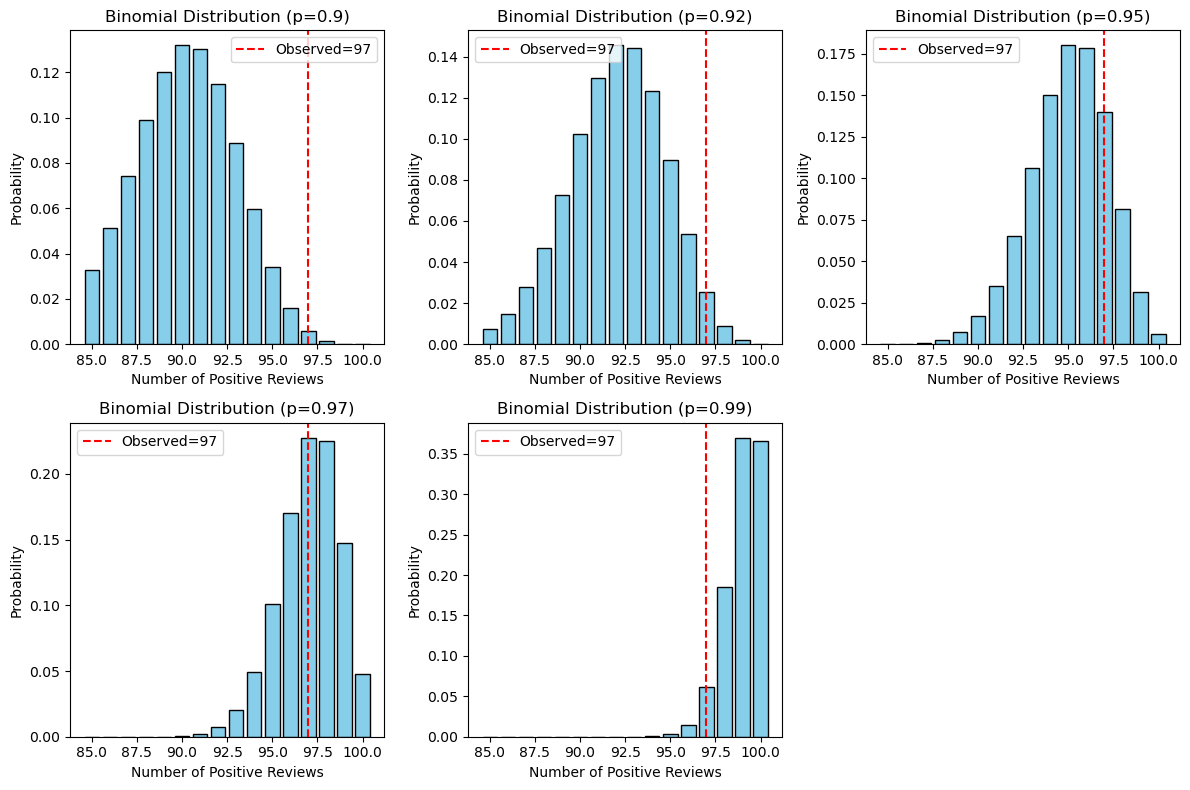

Likelihood of getting 97 with p=0.9: 5.89160e-03
Likelihood of getting 97 with p=0.92: 2.54331e-02
Likelihood of getting 97 with p=0.95: 1.39576e-01
Likelihood of getting 97 with p=0.97: 2.27474e-01
Likelihood of getting 97 with p=0.99: 6.09992e-02


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 100       # number of trials (reviews)
observed_k = 97  # observed positives
p_candidates = [0.90, 0.92, 0.95, 0.97, 0.99]

# Plot distributions
plt.figure(figsize=(12, 8))

for i, p in enumerate(p_candidates, 1):
    x = np.arange(85, 101)  # range of possible successes (just around observed)
    pmf = binom.pmf(x, n, p)

    plt.subplot(2, 3, i)
    plt.bar(x, pmf, color='skyblue', edgecolor='black')
    plt.axvline(observed_k, color='red', linestyle='--', label=f"Observed=97")
    plt.title(f"Binomial Distribution (p={p})")
    plt.xlabel("Number of Positive Reviews")
    plt.ylabel("Probability")
    plt.legend()

plt.tight_layout()
plt.show()

# Find which p is most likely at observed_k
for p in p_candidates:
    prob = binom.pmf(observed_k, n, p)
    print(f"Likelihood of getting 97 with p={p}: {prob:.5e}")


Interpretation

- The histogram shifts depending on 𝑝.

- When 𝑝 = 0.97, the distribution is centered right around 97, meaning it best explains the observed data.

- Lower p values (0.90, 0.92) peak way below 97, so they’re unlikely.

- Very high p (0.99) peaks at 99–100, so it also doesn’t fit as well.

- So the estimated success rate is around 0.97 (which matches our observed proportion).

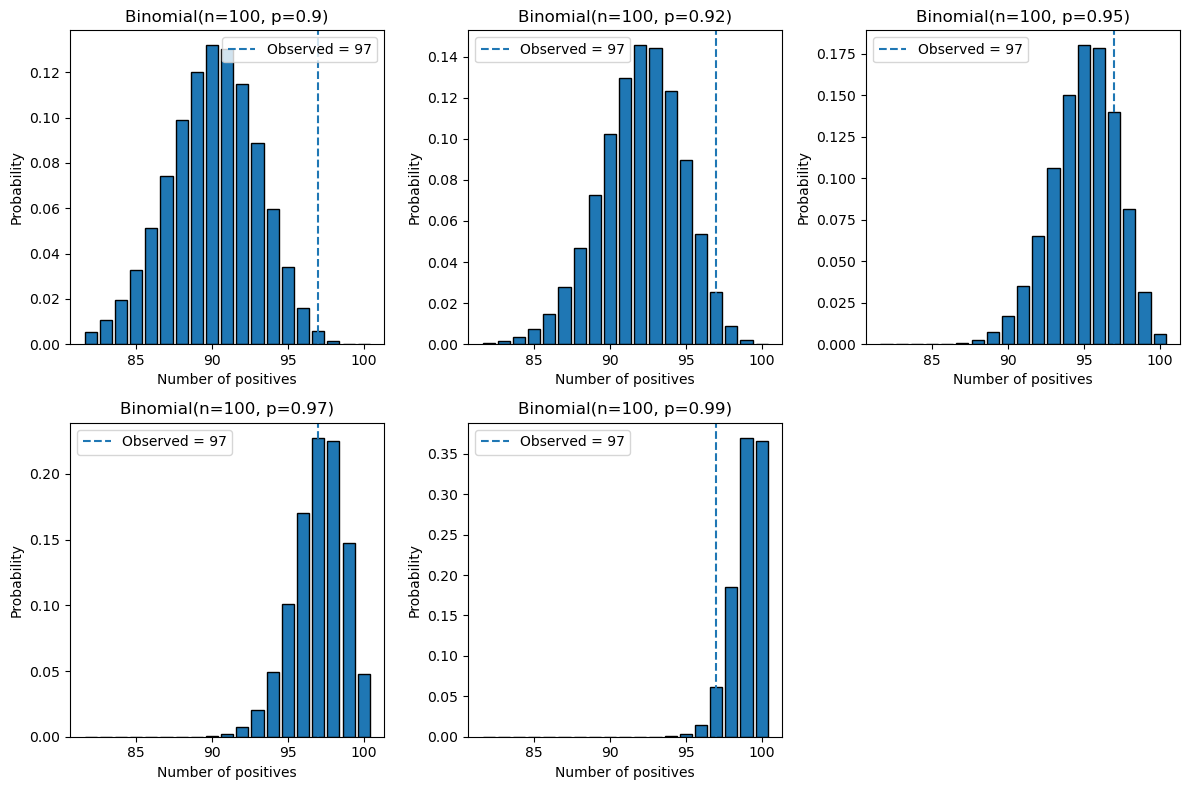

Likelihoods P(X=97 | p):
  p=0.90: 5.89160e-03
  p=0.92: 2.54331e-02
  p=0.95: 1.39576e-01
  p=0.97: 2.27474e-01
  p=0.99: 6.09992e-02


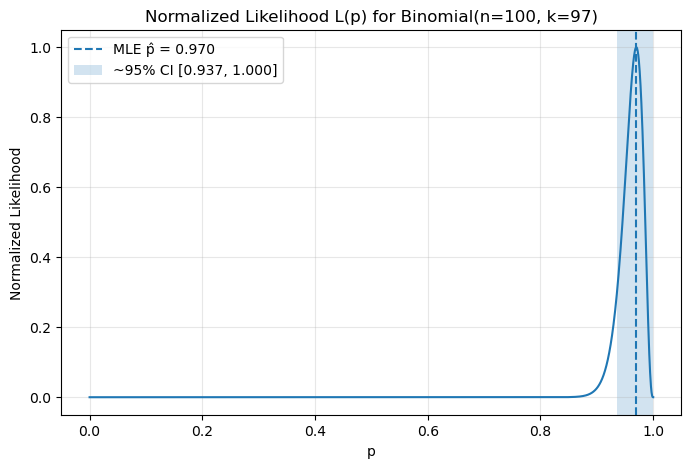


MLE p̂ = 0.9700
Approx. 95% CI (normal approx): [0.9366, 1.0000]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# -----------------------------
# Data
# -----------------------------
n = 100
k = 97
p_hat = k / n

# -----------------------------
# Part A: PMFs for candidate p
# -----------------------------
p_candidates = [0.90, 0.92, 0.95, 0.97, 0.99]

plt.figure(figsize=(12, 8))
x = np.arange(max(0, k-15), min(n, k+5)+1)

for i, p in enumerate(p_candidates, 1):
    pmf = binom.pmf(x, n, p)
    ax = plt.subplot(2, 3, i)
    ax.bar(x, pmf, edgecolor='black')
    ax.axvline(k, linestyle='--', label=f"Observed = {k}")
    ax.set_title(f"Binomial(n={n}, p={p})")
    ax.set_xlabel("Number of positives")
    ax.set_ylabel("Probability")
    ax.legend()

plt.tight_layout()
plt.show()

# Likelihood at observed k for each candidate p
print("Likelihoods P(X=97 | p):")
for p in p_candidates:
    print(f"  p={p:.2f}: {binom.pmf(k, n, p):.5e}")

# -----------------------------
# Part B: Likelihood curve L(p)
# -----------------------------
# L(p) ∝ p^k (1-p)^(n-k). We'll plot the normalized likelihood for stability.
p_grid = np.linspace(1e-6, 1-1e-6, 2000)
logL = k * np.log(p_grid) + (n - k) * np.log(1 - p_grid)
logL -= logL.max()                 # normalize peak to 0
L = np.exp(logL)                   # normalized likelihood in [0,1]

# 95% CI (large-sample normal approx): p̂ ± 1.96*sqrt(p̂(1-p̂)/n)
se = np.sqrt(p_hat * (1 - p_hat) / n)
ci_low = max(0.0, p_hat - 1.96 * se)
ci_high = min(1.0, p_hat + 1.96 * se)

plt.figure(figsize=(8, 5))
plt.plot(p_grid, L)
plt.axvline(p_hat, linestyle='--', label=f"MLE p̂ = {p_hat:.3f}")
plt.axvspan(ci_low, ci_high, alpha=0.2, label=f"~95% CI [{ci_low:.3f}, {ci_high:.3f}]")
plt.title(f"Normalized Likelihood L(p) for Binomial(n={n}, k={k})")
plt.xlabel("p")
plt.ylabel("Normalized Likelihood")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"\nMLE p̂ = {p_hat:.4f}")
print(f"Approx. 95% CI (normal approx): [{ci_low:.4f}, {ci_high:.4f}]")
